---
# <font color = red> Projet Isomorphisme </font>
---

<font color = yellow> *binôme : de l'Estourbeillon Joseph | Le Gourrierec Alan* </font>

Durant ce projet, nous allons exploiter les divers manière de détecter un **isomorphisme** entre deux graphes. Notre but est de trouver les manières de trouver le plus rapidement possible si deux graphes sont isomorphes ou non. Nous allons donc essayer de mettre en place des algorithmes optimisés au maximum pour déterminner au plus vite l'isomorphisme.

---

### <font color = green> Introduction </font>

Quelle est le but de ce projet ? Quelles sont les utilisations de l'isomorphisme dans le monde contemporain ?

Le but de ce projet est dans un premier temps de nous faire comprendre ce qu'est un isomorphisme en déterminant si deux graphes sont ou ne sont pas isomorphes. Il existe pour se faire divers crtières, et nous allons en utiliser 7 que nous aborderons tout au long de ce compte-rendu. Bien sûr il existe d'autres méthodes (plus complexes, mais plus complètes) pour les résoudre, et notre solution ne permet pas de résoudre tout les cas d'isomorphisme ... <br>

Nous nous sommes dans un premier temps renseigné sur les divers applications d'isomorphisme dont la première est celle de la chimie et possède d'après nous deux types majoritaire d'isomorphisme :
- isomorphisme comme nous allons le traiter dans ce compte rendu, les isomorphisme en géométrie plan
- isomorphisme spaciale, les isomorphisme en géométrie spaciale

Dans la chimie déterminer si oui ou non deux molécules sont isomorphes peut beaucoup affecter les recherches. Si elles ne le sont pas, par exemple, l'une des deux molécules possèderas sans doute une plus grande stabilité que l'autre. <br>
Ce n'est pas le seul domaine dans lequel on peut appliquer l'isomorphisme, il y a également, par exemple, la cryptographie avec les courbes éliptiques, l'algèbre linéaire et bien d'autres domaines. Nous allons dans notre cas nous intéresser à son application en théorie des graphes.

Nous utiliserons les librairies suivantes pour faire fonctionner les différents algorithmes présentés par la suite :

In [1]:
import networkx as nx
import numpy as np
import random as rng
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

---
## <font color = purple> Génération des exemples </font>

Dans un premier temps, nous allons générer les divers exemples que nous allons utiliser pour prouver le bon fonctionnement des programmes :
- un graph complet
- un graph chemin
- un graph taureau
- un graph aléatoire

Ceci nous permettra d'avoir des exemples dans les cas les plus extrêmes (pour graphe chemin ou encore graphe complet). Ces programes ne sont pas conçus pour des multi-graphes.

### <font color = purple> Graph complet </font>


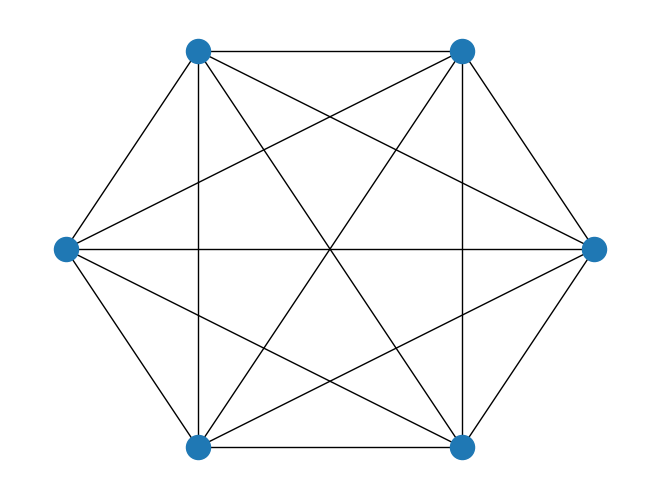

In [2]:
C = nx.complete_graph(6)
pos = nx.circular_layout(C)
nx.draw(C,pos=pos)
C = nx.to_numpy_array(C)

### <font color = purple> Graph Chemin </font>

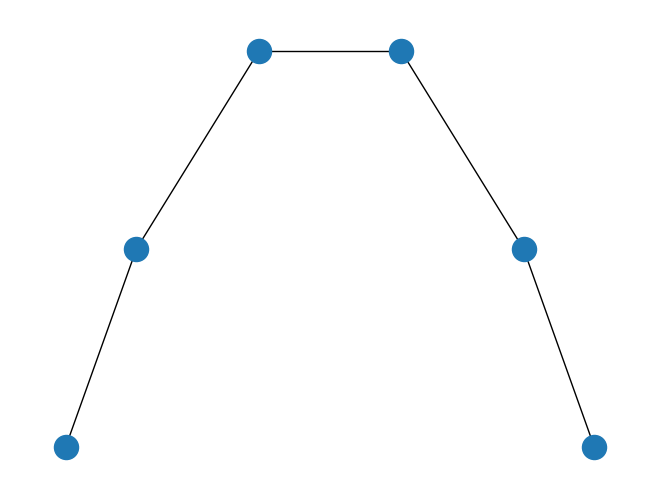

In [3]:
P = nx.path_graph(6)
pos = nx.spectral_layout(P)
nx.draw(P,pos=pos)
P = nx.to_numpy_array(P)

### <font color = purple> Graph taureau </font>

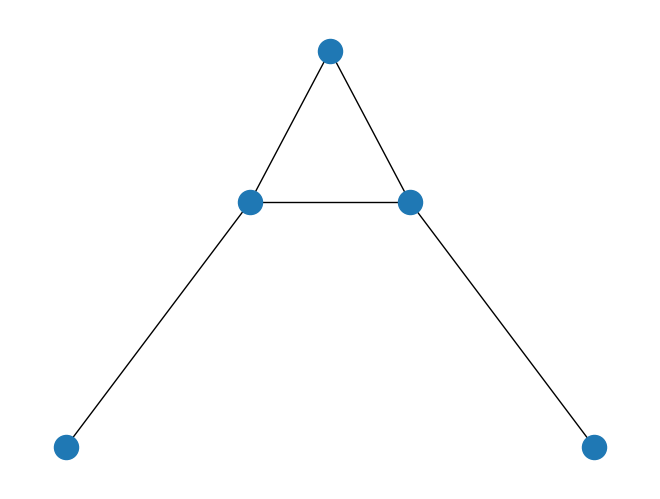

In [4]:
T = nx.bull_graph()
pos = nx.spectral_layout(T)
nx.draw(T,pos=pos)
T = nx.to_numpy_array(T)

### <font color = purple> Graph aléatoire </font>

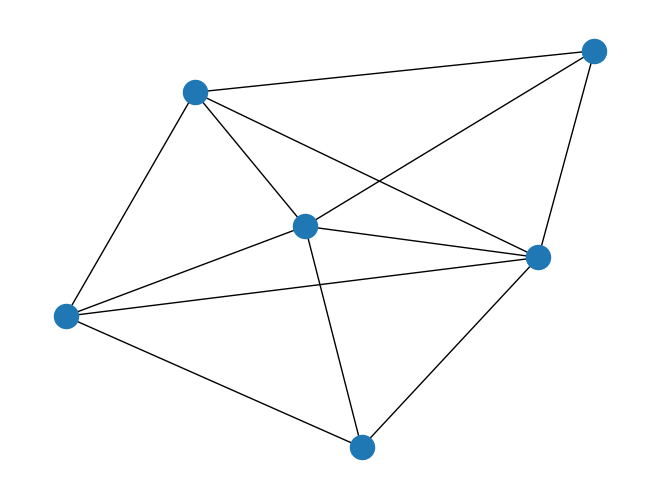

In [5]:
size = 6

def aleatoire(size):
    R = np.zeros((size,size))
    condition = False
    while condition != True:
        somme = 0
        for i in range(size):
            for j in range(size):
                if i != j :
                    R[i][j] = rng.randrange(2)
                    R[j][i] = R[i][j]
        for i in range(size):
            somme += max(R[i])

        if somme == size:
            return R
        
R = aleatoire(size)
nx.draw(nx.from_numpy_array(R))

## <font color = green> Fonctions utiles </font>

### <font color = green> Convertion Matrice d'Adjacence -> Matrice Laplacienne </font>

Nous allons ajouter une fonction qui permet de convertir une matrice d'adjacence en matrice laplacienne : 

In [6]:
# Matrice laplacienne : 
def laplacienne(A):
    # La fonction suite_degre() est définie par la suite
    D = np.diag(suite_Degre(A)) * np.identity(A.shape[0])
    L = D - A
    return L

## <font color = orange> Algorithmes pour la recherche de graphes isomorphes </font>

Maintenant que nous avons généré les exemples, nous allons attaquer le vif du sujet en présentant les différentes manières de trouver l'isomorphisme simplement. Nous savons que deux graphes ne sont pas isomorphes si ils n'ont pas les mêmes : 
- tailles et ordres,
- suites de degré,
- spectres,
- diamètres et rayons (excentricité),
- théorèmes des triangles,
- plus grand cycle.

Nous allons donc développer des algorithmes permettant de vérifier ces six critères.

### <font color = orange> Taille et ordre </font>
Dans un premier temps, nous allons créer le programme qui nous semblait le plus simple, la vérification de la `taille` et l'`ordre`.
- Pour trouver l'ordre d'un graphe, il suffit de compter le nombre de colonne ou de ligne de sa matrice d'adjacence.
- Pour obtenir la taille d'un graphe, il faut calculer la trace de cette matrice et la diviser par 2. En effet, la trace est la somme des arêtes de chaque sommet, or une arête à deux extrémités, donc automatiquement la trace renvoie deux fois plus d'arêtes qu'il n'y en a réellement, et c'est pour cela qu'il est nécessaire de diviser la trace par 2.

In [7]:
def meme_Ordre(M,N):
    return np.shape(M)[0]==np.shape(N)[0]

def meme_Taille(M,N):
    return np.trace(M@M)/2==np.trace(N@N)/2

A et B sont de meme ordre ?  True
A et B sont de meme taille ?  False
     - Taille de A :  3 arêtes
     - Taille de B :  5 arêtes


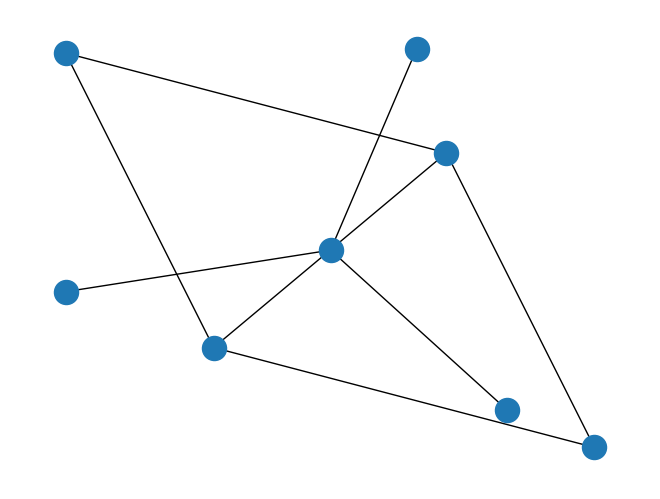

In [8]:
# Exemples : 
A = np.array([[0,1,0,0],
              [1,0,1,1],
              [0,1,0,0],
              [0,1,0,0]])
B = np.array([[0,1,1,0],
              [1,0,1,1],
              [1,1,0,1],
              [0,1,1,0]])

nx.draw(nx.from_numpy_array(A))
nx.draw(nx.from_numpy_array(B))
print("A et B sont de meme ordre ? ",meme_Ordre(A,B))
print("A et B sont de meme taille ? ",meme_Taille(A,B))
print("     - Taille de A : ",int(np.trace(A@A)/2),"arêtes")
print("     - Taille de B : ",int(np.trace(B@B)/2),"arêtes")

### <font color = orange> Suite de Degrés </font>

La deuxième chose à vérifier est la suite de degré de chaque matrice. En effet, c'est assez simple à trouver, puisqu'il suffit de compter le nombre d'arête qu'a chaque sommet. Il faut ensuite vérifier si les listes obtenues pour chacune des deux matrices sont identiques (l'ordre des listes ne compte pas, on peut par exemple les triées par ordre croissant pour faciliter la comparaison).

In [9]:
def suite_Degre(M):
    degre = []
    for i in M:
        n = sum(i)
        degre.append(n)
    return degre

def meme_Degre(M,N):
    degM = suite_Degre(M)
    degN = suite_Degre(N)
    degM.sort()
    degN.sort()
    return degM==degN

[2, 4, 2, 2, 2, 2]

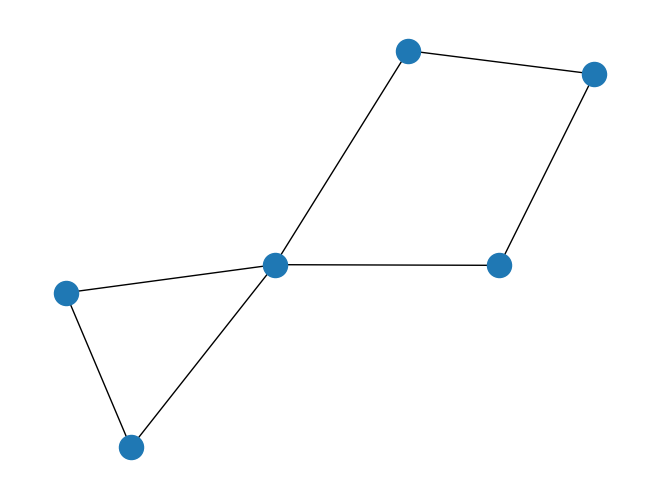

In [10]:
# Exemples
A = np.array([[0,1,1,0,0,0],
              [1,0,0,1,1,1],
              [1,0,0,0,0,1],
              [0,1,0,0,1,0],
              [0,1,0,1,0,0],
              [0,1,1,0,0,0]])

nx.draw(nx.from_numpy_array(A))
suite_Degre(A)

### <font color = orange> Spectre </font>

Par la suite, une autre vérification peut être faite, cependant celle-ci est plus complexe à la main. En effet, l'opération consiste à vérifier si les spectres des deux matrices sont identiques. Si ils sont différents, alors on en conclu directement que les graphes ne sont pas isomorphes, d'après le lemme du théorème spectral. Mais, si ils sont identiques, on ne peut pas conclure directement que les graphes sont isomorphes.

In [11]:
# Spectre
def spectre(M):
    s = np.linalg.eigvals(M)
    modif_s = []
    for i in s :
        if i<10**(-10):
            modif_s.append(0)
        else:
            modif_s.append(round(i,5))
    return modif_s

def meme_Spectre(M,N):
    spM = spectre(M)
    spM.sort()
    spN = spectre(N)
    spN.sort()
    return spM == spN


In [12]:
# Exemple :

# 1 - Spectres différents ->
print("1 - Spectres Différents ")
A = np.array([[0,1,0,0],
              [1,0,1,1],
              [0,1,0,0],
              [0,1,0,0]])
B = np.array([[0,1,1,0],
              [1,0,1,1],
              [1,1,0,1],
              [0,1,1,0]])
print("Spectre : ",meme_Spectre(laplacienne(A),laplacienne(B)))
print("   - Spectre A : ",spectre(laplacienne(A)))
print("   - Spectre B : ",spectre(laplacienne(B)))


# 2 - Même spectre, mais non-isomorphes ->
print("\n2 - Même spectre, mais non-isomorphes ")
A = np.array([[0,1,1,0,0,0],
              [1,0,0,1,1,1],
              [1,0,0,0,0,1],
              [0,1,0,0,1,0],
              [0,1,0,1,0,0],
              [0,1,1,0,0,0]])
B = np.array([[0,1,1,0,0,0],
              [1,0,0,1,0,1],
              [1,0,0,1,0,1],
              [0,1,1,0,1,0],
              [0,0,0,1,0,0],
              [0,1,1,0,0,0]])

print("Ordre   : ",meme_Ordre(A,B))
print("Taille  : ",meme_Taille(A,B))
print("Degré   : ",meme_Degre(A,B))
print("   - Suite de degré de A : ",suite_Degre(A))
print("   - Suite de degré de B : ",suite_Degre(B))
print("Spectre : ",meme_Spectre(laplacienne(A),laplacienne(B)))
print("   - Spectre A : ",spectre(laplacienne(A)))
print("   - Spectre B : ",spectre(laplacienne(B)))

1 - Spectres Différents 
Spectre :  False
   - Spectre A :  [4.0, 0, 1.0, 1.0]
   - Spectre B :  [0, 2.0, 4.0, 4.0]

2 - Même spectre, mais non-isomorphes 
Ordre   :  True
Taille  :  True
Degré   :  False
   - Suite de degré de A :  [2, 4, 2, 2, 2, 2]
   - Suite de degré de B :  [2, 3, 3, 3, 1, 2]
Spectre :  True
   - Spectre A :  [5.23607, 3.0, 2.0, 0, 0.76393, 3.0]
   - Spectre B :  [5.23607, 0, 0.76393, 2.0, 3.0, 3.0]


### <font color = orange> Excentricité </font>

Pour vérifier l'excentricité d'une matrice, nous utilisons le fait que lorsque nous mettons cette matrice à une certaine puissance, comme 2, nous obtenons l'entièreté des sommets atteignables avec des chemins de longueur 2, pour 3 ceux atteignables avec des chemins de longueurs 3, ... <br>
Nous allons donc réaliser une fonction 'Excentricity' qui s'arrête lorsque la puissance est égale à l'ordre de la matrice (car si nous continuons, nous retournerons sur nos pas).

La fonction nous renvoie donc la liste des excentricités pour chaque sommet (nous ne prenons pas en compte les multigraph donc nous ne pouvons pas avoir de valeurs infinies).

In [13]:
def Excentricity(matrice):
    n = np.shape(matrice)[0]
    result = np.zeros(n)
    tmp = np.identity(n)
    matrice = matrice + tmp
    
    for amount in range(n):
        tmp = np.matmul(tmp,matrice)
        
        # nous regardons si toutes les lignes de notre matrice sont bien non null
        for i in range(n): 
            if int(min(tmp[i])) > 0 and result[i] == 0: 
                result[i] = amount + 1
    
    return result       

def meme_Excentricity(M,N):
    extM = Excentricity(M)
    extM.sort()
    extN = Excentricity(N)
    extN.sort()
    return np.array_equal(extM,extN)


In [14]:
# Exemple : 
# 1 - Excentricité du graphe taureau :  
print("Excentricité du graphe taureau : ",Excentricity(T))

# 2 - Excentricité entre les graphes A et B créés précédemments
print("Les graphes A et B ont la même excentricité ?",meme_Excentricity(A,B))
print("         - Excentricity(A) =",Excentricity(A))
print("         - Excentricity(B) =",Excentricity(B))

Excentricité du graphe taureau :  [2. 2. 2. 3. 3.]
Les graphes A et B ont la même excentricité ? True
         - Excentricity(A) = [2. 2. 3. 3. 3. 2.]
         - Excentricity(B) = [3. 2. 2. 2. 3. 3.]


### <font color = orange> Théorème des Triangles </font>

Nous avons aussi essayé de faire un algorithme pour déterminer les mailles, mais celui-ci, avec diverses discutions avec des camarades de classe nous semblait quasiment impossible à réaliser et/ou ne nous ferait que résoudre 1% des cas suplémentaires en augmentant la complexité de façons drastique.
J'ai donc décider d'utiliser le `théorèmes des triangles` qui dit que :
"chaque graphe isomorphe possède le même nombre de triangle".<br>
Pour résoudre ceci, nous allons donc simplement utiliser : $\frac{tr(Matrice^3)}{6}$, Ceci nous permet d'obtenir tout les triangles :
- **sans** répétition, car les matrices d'adjacences sont symétriques $\rightarrow$ nous devons diviser par 2. <br>
- Il y a aussi 3 manières de représenter un triangle ABC : ABC, BCA, CAB $\rightarrow$ nous divisons donc par 3. <br>
Pour finir, nous mettons la matrice au cube, comme pour l'excentricité, pour savoir si nous retombons au troisième coup sur notre position initiale.


In [15]:
def Triangle(matrice):
    matrice = np.linalg.matrix_power(matrice,3)
    trace = np.trace(matrice)
    return trace/6

def meme_nbrTriangle(M,N):
    return Triangle(M)==Triangle(N)


In [16]:
# Exemple : 
# 1 - Nombre de triangle pour la matrice Bull : 
print(Triangle(T))

# 2 - Nombre de triangle pour un graphe complet à 6 cotés : 
print(Triangle(C))

1.0
20.0


### <font color = orange> Plus grand cycle </font>

Afin de réunir un paramètres de plus, nous avons réalisé un algorithme permetant de déterminer le cycle le plus long. Pour se faire, nous utilisons le programme suivant avec la fonction 'MaxCycle'. Pour se faire, nous essayons tout les cas possibles, si ceci ne forment pas un cycle alors nous arrêtons et recommençons au point suivant et ainsi de suite. Nous renvoyons donc la valeur maximale. 

In [17]:
from itertools import permutations

def MaxCycle(matrice):
    n = len(matrice)
    
    for taille in range(n, 2, -1):
        for perm in permutations(range(n), taille):
            cycle = list(perm)
            cycle += [cycle[0]] 
            
            est_cycle = True
            for i in range(taille):
                if matrice[cycle[i]][cycle[i+1]] != 1:
                    est_cycle = False
                    break
            
            if est_cycle:
                return max(cycle)+1
    return []

def meme_MaxCycle(M,N):
    return MaxCycle(M) == MaxCycle(N)


True
False


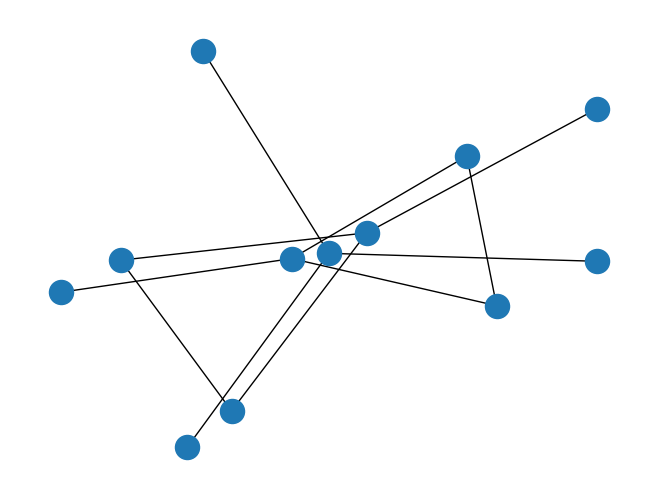

In [18]:
# Exemple : 
A = np.array([[0,1,1,1],
              [1,0,0,1],
              [1,0,0,0],
              [1,1,0,0]])
B = np.array([[0,0,1,1],
              [0,0,1,0],
              [1,1,0,1],
              [1,0,1,0]])
# affichage des graphes
nx.draw(nx.from_numpy_array(A))
nx.draw(nx.from_numpy_array(B))
# 1- meme plus grand cycle : 
print(meme_MaxCycle(A,B))
# 2- cycle differents
    # B -> graphe étoile donc il n'y a pas de cycle
B = np.array([[0,0,1,0],
              [0,0,1,0],
              [1,1,0,1],
              [0,0,1,0]])
# affichage du graphe
nx.draw(nx.from_numpy_array(B))
print(meme_MaxCycle(A,B))

### <font color = orange> Liste des cycles </font>

Cet algo n'a pas été réalisé car jugé trop complexe par nous et surtout ce serait un algorithme avec une très grande complexité, il serait donc peu partique et ne permettrait de résoudre que probablement 1% des cas en plus. <br>
Cet algorihme d'après nous serait de complexité n⁴ (une **très** forte complexité) car il faut prendre en compte tous les chemins, en partant de chaque point, stocker ces chemins. Ensuite il faut donc retourner la quantité de chaque cycle et vérifier qu'ils ne sont pas en plusieurs exemplaires (ce n'est pas spécialement difficile, il nous suffit de diviser chaque résultat de la manières suivante : $\frac{quantité de cycle}{2 * taille du cycle}$).

## <font color = blue> Recherche de graphes Isomorphes (fonctions simples) </font>

Pour vérifier si deux graphes sont isomorphes, il faut que, pour ces deux graphes, toutes les conditions suivantes soient vraies : 
- même taille,
- même ordre,
- même suite de degré,
- même spectre,
- même excentricité,
- même nombre de triangles,
- et même plus grand cycle.

Si une des conditions est fausse, alors les deux graphes ne peuvent pas être isomorphes. <br>
Ceci n'est bien sûr pas réciproque, par exemple, nous ne comparons pas tous les cycles des deux graphes, donc il peut y avoir une différences de suite de cycle entre les deux graphes. De plus, on ne compare pas la maille des deux graphes, donc il peut y avoir une différence à ce niveau.

La fonction suivante permet donc de vérifier toutes ces conditions sur deux graphes.

In [19]:
def isomorphe(M,N):
    print("\nOrdre        :",meme_Ordre(M,N),
          "\nTaille       :",meme_Taille(M,N),
          "\nDegre        :",meme_Degre(M,N),
          "\nSpectre      :",meme_Spectre(M,N),
          "\nExcentricité :",meme_Excentricity(M,N),
          "\nNbrtriangles :",meme_nbrTriangle(M,N),
          "\nCycle max    :",meme_MaxCycle(M,N))
    if (meme_Ordre(M,N) and 
        meme_Taille(M,N) and
        meme_Degre(M,N) and
        meme_Spectre(M,N) and 
        meme_Excentricity(M,N) and
        meme_nbrTriangle(M,N)and 
        meme_MaxCycle(M,N)):
        return True
    else:
        return False

Créons deux matrices R1 et R2 aléatoires pour les tests :

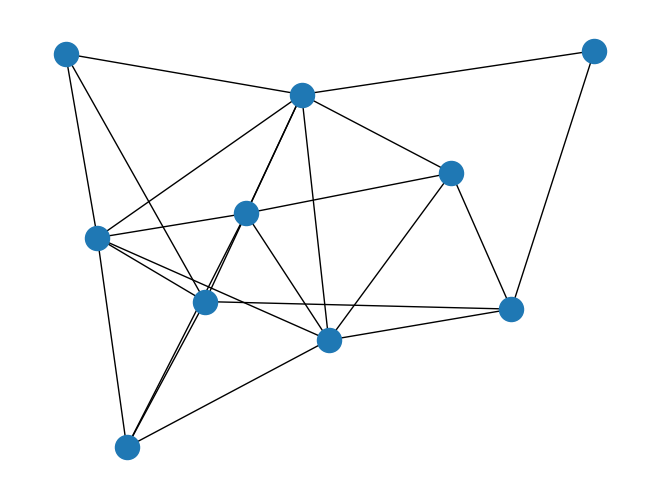

In [20]:
size = 10
R1 = aleatoire(size)
# print(R1)
nx.draw(nx.from_numpy_array(R1))

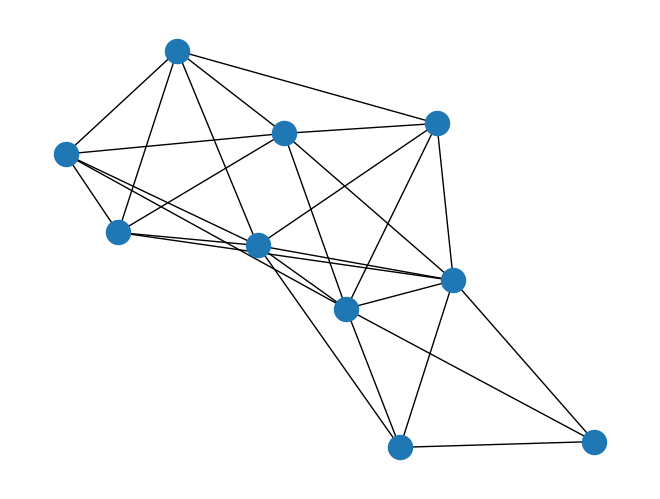

In [21]:
R2 = aleatoire(size)
# print(R2)
nx.draw(nx.from_numpy_array(R2))

In [22]:
# Exemples : 
print(isomorphe(T,T))
print(isomorphe(C,T))
print(isomorphe(R1,R2))
print(isomorphe(P,C))


Ordre        : True 
Taille       : True 
Degre        : True 
Spectre      : True 
Excentricité : True 
Nbrtriangles : True 
Cycle max    : True
True

Ordre        : False 
Taille       : False 
Degre        : False 
Spectre      : False 
Excentricité : False 
Nbrtriangles : False 
Cycle max    : False
False

Ordre        : True 
Taille       : False 
Degre        : False 
Spectre      : False 
Excentricité : True 
Nbrtriangles : False 
Cycle max    : True
False

Ordre        : True 
Taille       : False 
Degre        : False 
Spectre      : False 
Excentricité : False 
Nbrtriangles : False 
Cycle max    : False
False


## <font color = silver> Recherches annexes sur l'isomorphisme </font>

Une solution pour trouver si deux graphes sont isomorphes est de chercher une correspondance biunivoque. L'enjeu est donc de trouver pour chaque sommet du graphe A un sommet correspondant dans le graphe B, tel que le sommet est autant d'arête dans les deux graphes, et que les arêtes soient orientées dans le bon sens dans le cas de graphes orientés. Cette solution nécessite une manipulation des matrices. On construit donc un système (X,I), avec X l'ensemble des sommets et I la fonction qui associe à chaque sommet ceux qui peuvent être atteints directement (en suivant 1 arc/arête) en suivant l'orientation.

Sources : 
- http://www.numdam.org/article/M2AN_1969__3_3_51_0.pdf
- https://www.esaim-m2an.org/articles/m2an/pdf/1971/03/m2an197105R300391.pdf

